In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from numpy.linalg import norm

In [3]:
# Read Data Set
taxi_trip_duration = pd.read_csv('../data/train.csv')

In [4]:
taxi_trip_duration.head(10)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
5  id0801584          2  2016-01-30 22:01:40  2016-01-30 22:09:03   
6  id1813257          1  2016-06-17 22:34:59  2016-06-17 22:40:40   
7  id1324603          2  2016-05-21 07:54:58  2016-05-21 08:20:49   
8  id1301050          1  2016-05-27 23:12:23  2016-05-27 23:16:38   
9  id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   
6                4        -73.969017        40.757839         -73.957405   
7                1        -73.969276        40.797779         -73.922470   
8                1        -73.999481        40.738400         -73.985786   
9                1        -73.981049        40.744339         -73.973000   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435  
5         40.749184                  N            443  
6         40.765896                  N            341  
7         40.760559                  N           1551  
8         40.732815                  N            255  
9         40.789989                  N           1225

# EDA

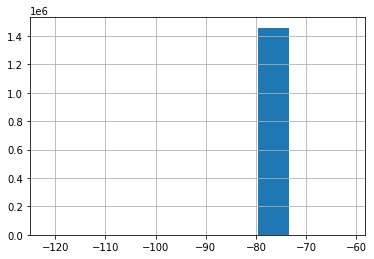

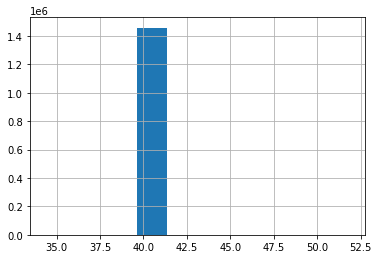

<AxesSubplot:>

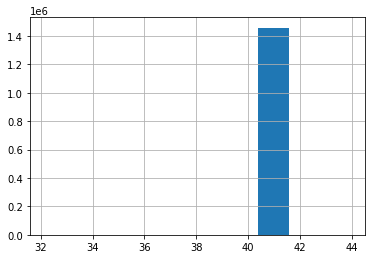

In [5]:
taxi_trip_duration.pickup_longitude.hist()
plt.show()
taxi_trip_duration.pickup_latitude.hist()
plt.show()
taxi_trip_duration.dropoff_latitude.hist()

# Removing Outliers

In [7]:
print(taxi_trip_duration.shape[0])

taxi_trip_duration = taxi_trip_duration.loc[taxi_trip_duration.pickup_longitude < (taxi_trip_duration.pickup_longitude.mean()+taxi_trip_duration.pickup_longitude.std()*3)]
taxi_trip_duration = taxi_trip_duration.loc[taxi_trip_duration.pickup_longitude > (taxi_trip_duration.pickup_longitude.mean()-taxi_trip_duration.pickup_longitude.std()*3)]

taxi_trip_duration = taxi_trip_duration.loc[taxi_trip_duration.pickup_latitude < (taxi_trip_duration.pickup_latitude.mean()+taxi_trip_duration.pickup_latitude.std()*3)]
taxi_trip_duration = taxi_trip_duration.loc[taxi_trip_duration.pickup_latitude > (taxi_trip_duration.pickup_latitude.mean()-taxi_trip_duration.pickup_latitude.std()*3)]

taxi_trip_duration = taxi_trip_duration.loc[taxi_trip_duration.dropoff_latitude < (taxi_trip_duration.dropoff_latitude.mean()+taxi_trip_duration.dropoff_latitude.std()*3)]
taxi_trip_duration = taxi_trip_duration.loc[taxi_trip_duration.dropoff_latitude > (taxi_trip_duration.dropoff_latitude.mean()-taxi_trip_duration.dropoff_latitude.std()*3)]

print('After removing Outliers')
print(taxi_trip_duration.shape[0])


1458644
After removing Outliers
1393407


# More EDA

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

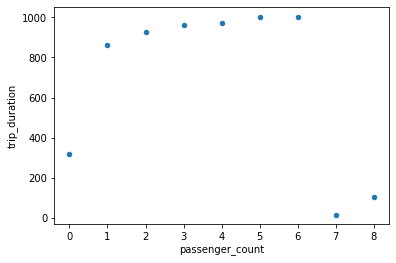

In [8]:
taxi_trip_duration.groupby(['passenger_count'], as_index=False)['trip_duration'].mean().plot(kind='scatter', x='passenger_count',y='trip_duration')

# Creating Time Based Features

In [9]:
taxi_trip_duration.pickup_datetime = pd.to_datetime(taxi_trip_duration.pickup_datetime)

In [10]:
taxi_trip_duration['month'] = taxi_trip_duration.pickup_datetime.dt.month
taxi_trip_duration['day'] = taxi_trip_duration.pickup_datetime.dt.day
taxi_trip_duration['weekday']  = taxi_trip_duration.pickup_datetime.dt.weekday
taxi_trip_duration['hour'] = taxi_trip_duration.pickup_datetime.dt.hour

# Some More EDA

<AxesSubplot:xlabel='month', ylabel='trip_duration'>

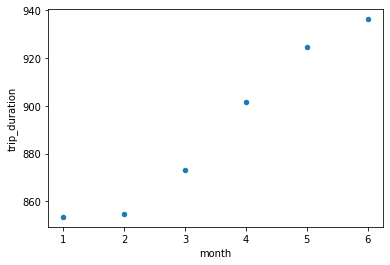

In [11]:
taxi_trip_duration.groupby(['month'], as_index=False)['trip_duration'].mean().plot(kind='scatter', x='month',y='trip_duration')

<AxesSubplot:xlabel='day', ylabel='trip_duration'>

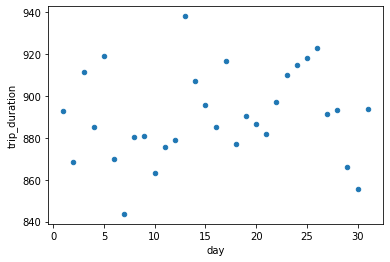

In [12]:
taxi_trip_duration.groupby(['day'], as_index=False)['trip_duration'].mean().plot(kind='scatter', x='day',y='trip_duration')

<AxesSubplot:xlabel='weekday', ylabel='trip_duration'>

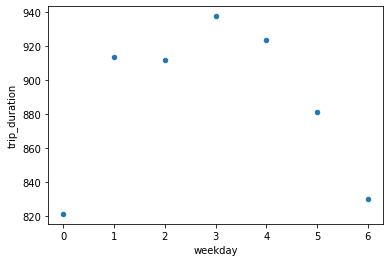

In [13]:
taxi_trip_duration.groupby(['weekday'], as_index=False)['trip_duration'].mean().plot(kind='scatter', x='weekday',y='trip_duration')

<AxesSubplot:xlabel='hour', ylabel='trip_duration'>

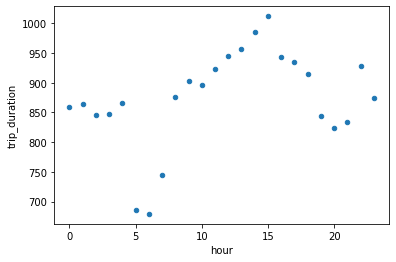

In [14]:
taxi_trip_duration.groupby(['hour'], as_index=False)['trip_duration'].mean().plot(kind='scatter', x='hour',y='trip_duration')

# Calculate Distance Features

In [15]:
taxi_trip_duration['eucl_distance'] = norm(taxi_trip_duration.iloc[:, [5,6]].values - taxi_trip_duration.iloc[:, [7,8]], axis=1)

In [16]:
eucl_dist_plot = taxi_trip_duration.groupby(['eucl_distance'], as_index=False)['trip_duration'].mean()
eucl_dist_plot['eucl_distance'] = eucl_dist_plot['eucl_distance'].round(2)

<AxesSubplot:xlabel='eucl_distance', ylabel='trip_duration'>

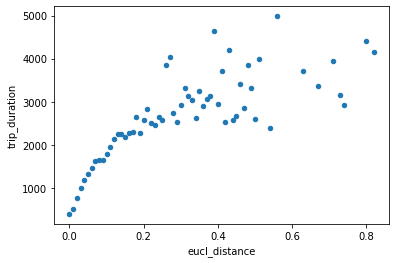

In [17]:
eucl_dist_plot.groupby(['eucl_distance'], as_index=False)['trip_duration'].mean().plot(kind='scatter', x='eucl_distance',y='trip_duration')

# Plot Map

In [24]:
ny = plt.imread('../data/map/map.jpg')

In [25]:
taxi_trip_duration

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0               -73.964630         40.765602                  N   
1               -73.999481         40.731152                  N   
2               -74.005333         40.710087                  N   
3               -74.012268         40.706718                  N   
4               -73.972923         40.782520                  N   
...                    ...               ...                ...   
1458639         -73.994911         40.740170                  N   
1458640         -73.970184         40.796547                  N   
1458641         -74.004433         40.707371                  N   
1458642         -73.974632         40.757107                  N   
1458643         -73.972809         40.790585                  N   

         trip_duration  month  day  weekday  hour  eucl_distance  
0                  455      3   14        0    17       0.017680  
1                  663      6   12        6     0       0.020456  
2                 2124      1   19        1    11       0.059934  
3                  429      4    6        2    19       0.013438  
4                  435      3   26        5    13       0.010690  
...                ...    ...  ...      ...   ...            ...  
1458639            778      4    8        4    13       0.013791  
1458640            655      1   10        6     7       0.057998  
1458641            764      4   22        4     6       0.076327  
1458642            373      1    5        1    15       0.010962  
1458643            198      4    5        1    14       0.011106  

[1393407 rows x 16 columns]

In [65]:
lat_pickup = taxi_trip_duration.pickup_latitude.iloc[30000]
long_pickup = taxi_trip_duration.pickup_longitude.iloc[30000]
lat_dropoff = taxi_trip_duration.dropoff_latitude.iloc[30000]
long_dropoff = taxi_trip_duration.dropoff_longitude.iloc[30000]

In [66]:
bounding_box

(-74.17960357666014, -73.76233673095702, 40.66739273071289, 40.835315704345696)

In [67]:
bounding_box = ((taxi_trip_duration.pickup_longitude.min(), taxi_trip_duration.pickup_longitude.max(),
                taxi_trip_duration.pickup_latitude.min(), taxi_trip_duration.pickup_latitude.max()))

In [84]:
pts = np.c_[long_pickup, lat_pickup, long_dropoff, lat_dropoff]

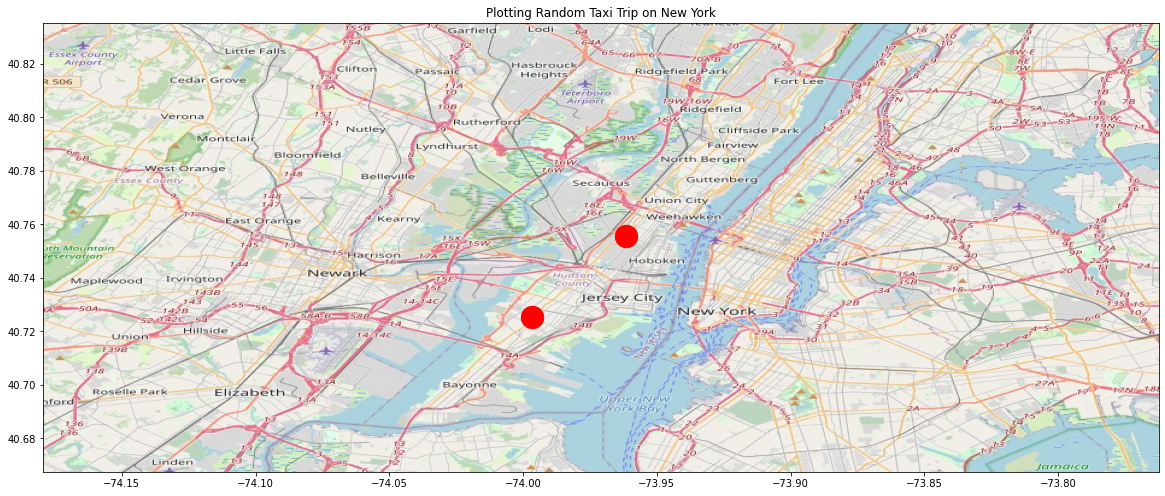

In [94]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(long_pickup, lat_pickup, zorder=1, c='r', s=500)
ax.scatter(long_dropoff, lat_dropoff, zorder=1, c='r', s=500)
ax.set_title('Plotting Random Taxi Trip on New York')
ax.set_xlim(bounding_box[0],bounding_box[1])
ax.set_ylim(bounding_box[2],bounding_box[3])
ax.imshow(ny, zorder=0, extent = bounding_box, aspect= 'equal')

# Model

In [95]:
# Just to reduce time to train in the example
taxi_trip_duration = taxi_trip_duration.sample(10000)

In [96]:
features = taxi_trip_duration[['vendor_id','passenger_count','month','day','weekday','hour','eucl_distance']]
target = taxi_trip_duration['trip_duration']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [99]:
# Start Modelling

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 50, num = 2)]
max_features = ['auto', 'sqrt']
max_depth = [10,25,30,50,70,100]
min_samples_split = [20, 50, 100]
min_samples_leaf = [5, 10, 15]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [100]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=10, random_state=42, n_jobs = 2)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 25, 30, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [20, 50, 100],
                                        'n_estimators': [20, 50]},
                   random_state=42, verbose=10)

In [101]:
best_params = rf_random.best_params_

In [102]:
best_model = rf_random.best_estimator_

In [103]:
np.sqrt(mean_squared_error(
    best_model.predict(X_test),
    y_test
))

2458.5633458107714

In [104]:
taxi_trip_duration.trip_duration.mean()

845.958